In [1]:
import vit as vit
import torch
import matplotlib.pyplot as plt
from saliency import *
from plots import *
from metrics import *
from utils import *

# __main__

model = torch.load('/home/raza.imam/Documents/HC701B/Project/models/vit_base_patch16_224_in21k_test-accuracy_0.96_chest.pth').cuda()
model = model.eval()
classifier = vit.vit_base_patch16_224()
classifier.head = torch.nn.Linear(in_features=model.head.in_features, out_features=model.head.out_features)
# print(classifier)
classifier.load_state_dict(model.state_dict())

<All keys matched successfully>

## All Attn Maps

In [2]:
image_folder = '/home/raza.imam/Documents/HC701B/Project/data/TB_data/training/Normal'


N_images = 1
N_random = False
N_heads = 1

all_saliencies_normal = []
all_saliencies_adv = []
all_saliencies_diff = []


for block in range(12):
    for head in range(12):
        mean_saliency_normal, mean_saliency_adv, saliency_diff, saliencies_normal, saliencies_adv = mean_saliency_generate(N_images=N_images,\
                                                                    image_folder=image_folder, N_random=N_random,
                                                                    block=block, head=head, N_heads=N_heads, classifier=classifier)
        all_saliencies_normal.append(mean_saliency_normal)
        all_saliencies_adv.append(mean_saliency_adv)
        all_saliencies_diff.append(saliency_diff)
        

mean_saliency_normal.shape: (14, 14)


/home/raza.imam/.conda/envs/xaim/lib/python3.7/site-packages/captum/_utils/gradient.py:59: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  "required_grads has been set automatically." % index


mean_saliency_adv.shape: (14, 14)
saliency_diff.shape: (14, 14)
mean_saliency_normal.shape: (14, 14)
mean_saliency_adv.shape: (14, 14)
saliency_diff.shape: (14, 14)
mean_saliency_normal.shape: (14, 14)
mean_saliency_adv.shape: (14, 14)
saliency_diff.shape: (14, 14)
mean_saliency_normal.shape: (14, 14)
mean_saliency_adv.shape: (14, 14)
saliency_diff.shape: (14, 14)
mean_saliency_normal.shape: (14, 14)
mean_saliency_adv.shape: (14, 14)
saliency_diff.shape: (14, 14)
mean_saliency_normal.shape: (14, 14)
mean_saliency_adv.shape: (14, 14)
saliency_diff.shape: (14, 14)
mean_saliency_normal.shape: (14, 14)
mean_saliency_adv.shape: (14, 14)
saliency_diff.shape: (14, 14)
mean_saliency_normal.shape: (14, 14)
mean_saliency_adv.shape: (14, 14)
saliency_diff.shape: (14, 14)
mean_saliency_normal.shape: (14, 14)
mean_saliency_adv.shape: (14, 14)
saliency_diff.shape: (14, 14)
mean_saliency_normal.shape: (14, 14)
mean_saliency_adv.shape: (14, 14)
saliency_diff.shape: (14, 14)
mean_saliency_normal.shape:

In [7]:
def normaliz(a):
    a = (a-a.min())/(a.max()-a.min())
    return a

def standardiz(a):
    a = (a-a.mean())/(a.std())
    return a

In [4]:
# let's normalize
all_saliencies_diff_norm = [normaliz(i) for i in all_saliencies_diff]
all_saliencies_adv_norm = [normaliz(i) for i in all_saliencies_adv]
all_saliencies_normal_norm = [normaliz(i) for i in all_saliencies_normal]

In [5]:
# let's standarize
all_saliencies_diff_std = [standardiz(i) for i in all_saliencies_diff]
all_saliencies_adv_std = [standardiz(i) for i in all_saliencies_adv]
all_saliencies_normal_std = [standardiz(i) for i in all_saliencies_normal]

/home/raza.imam/.conda/envs/xaim/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


In [ ]:
plt.figure(figsize=(20,20))

for i in range(12*12):
    plt.subplot(12, 12, 1+i)
    plt.imshow(all_saliencies_normal_norm[i])

In [ ]:
plt.figure(figsize=(20,20))

for i in range(12*12):
    plt.subplot(12, 12, 1+i)
    plt.imshow(all_saliencies_adv_norm[i])


In [ ]:
plt.figure(figsize=(20,20))

for i in range(12*12):
    plt.subplot(12, 12, 1+i)
    plt.imshow(all_saliencies_diff[i], vmin=0, vmax=0.005)

# 1.

### Mean of 1000 image attns. Each attn via image ==> block=-1 and Head=-1

On Block -1
mean_saliency_normal.shape: (14, 14)


/home/raza.imam/.conda/envs/xaim/lib/python3.7/site-packages/captum/_utils/gradient.py:59: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  "required_grads has been set automatically." % index


mean_saliency_adv.shape: (14, 14)
saliency_diff.shape: (14, 14)
saliency_diff.shape (14, 14)


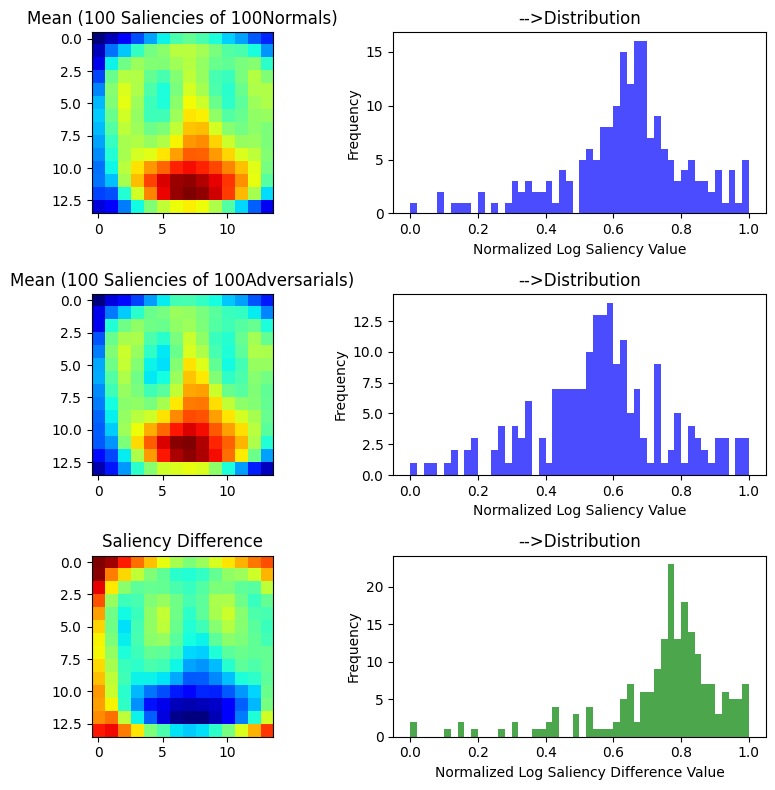

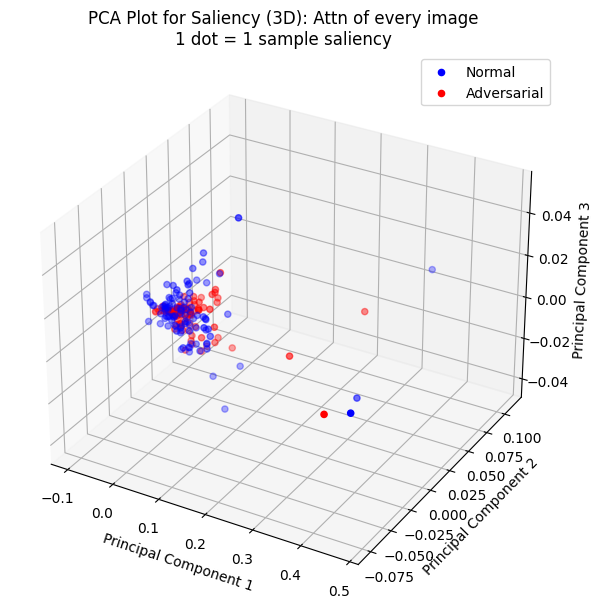

In [13]:
image_folder = '/home/raza.imam/Documents/HC701B/Project/data/TB_data/training/Normal'
block = -1
head = -1
N_images = 100
N_random = True
N_heads = 1

print(f"On Block {block}")
mean_saliency_normal, mean_saliency_adv, saliency_diff, saliencies_normal, saliencies_adv = mean_saliency_generate(N_images=N_images,\
                                                            image_folder=image_folder, N_random=N_random,
                                                            block=block, head=head, N_heads=N_heads, classifier=classifier)
plot_sal_hist_kde(mean_saliency_normal, mean_saliency_adv, saliency_diff, N_images, saliencies_normal, saliencies_adv, kde=False, pca=True)

### Test 1 Sample and Visualize

saliency_diff.shape (14, 14)


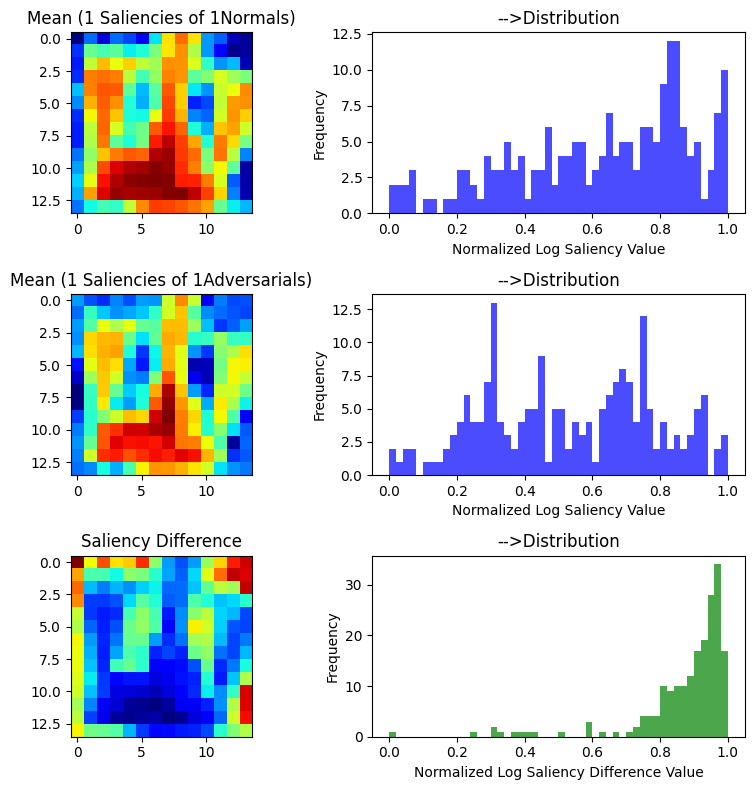

When saliency_normal_0 is compared:
sum_del_N: 0.32334965467453003 sum_del_A: 0.14031101763248444
Prediction: Adversarial

When saliency_adv_0 is compared:
sum_del_N: 0.5650896430015564 sum_del_A: 0.3820509612560272
Prediction: Adversarial

When saliency_normal_0 is compared:
forb_N: 0.026195736601948738 forb_Adv: 0.012430833652615547
Prediction: Adversarial

When saliency_adv_0 is compared:
forb_N: 0.04326780512928963 forb_Adv: 0.028081461787223816
Prediction: Adversarial



In [38]:
image_folder = "/home/raza.imam/Documents/HC701B/Project/data/TB_data/testing/Normal"

image_file, saliency_normal_0, saliency_adv_0, saliency_diff = test_img_saliency(image_folder, block, head, classifier)
plot_sal_hist_kde(saliency_normal_0, saliency_adv_0, saliency_diff, N_images=1, kde=False, pca=False)
# ---
print("When saliency_normal_0 is compared:")
sum_N, sum_Adv = sum_metric(saliency_normal_0, mean_saliency_normal, mean_saliency_adv)
print(f"sum_del_N: {sum_N}", f"sum_del_A: {sum_Adv}")
if sum_N <= sum_Adv:
    pred = "Normal"
else:
    pred = "Adversarial"
print(f"Prediction: {pred}\n")

print("When saliency_adv_0 is compared:")
sum_N, sum_Adv = sum_metric(saliency_adv_0, mean_saliency_normal, mean_saliency_adv)
print(f"sum_del_N: {sum_N}", f"sum_del_A: {sum_Adv}")
if sum_N <= sum_Adv:
    pred = "Normal"
else:
    pred = "Adversarial"
print(f"Prediction: {pred}\n")
# ---
print("When saliency_normal_0 is compared:")
forb_N, forb_Adv = frobenius_norm_metric(saliency_normal_0, mean_saliency_normal, mean_saliency_adv)
print(f"forb_N: {forb_N}", f"forb_Adv: {forb_Adv}")

if forb_N <= forb_Adv:
    pred = "Normal"
else:
    pred = "Adversarial"
print(f"Prediction: {pred}\n")

print("When saliency_adv_0 is compared:")
forb_N, forb_Adv = frobenius_norm_metric(saliency_adv_0, mean_saliency_normal, mean_saliency_adv)
print(f"forb_N: {forb_N}", f"forb_Adv: {forb_Adv}")

if forb_N <= forb_Adv:
    pred = "Normal"
else:
    pred = "Adversarial"
print(f"Prediction: {pred}\n")

### Test samples

In [41]:
from utils import generate_and_save_metrics
N = 5
image_folder_N = "/home/raza.imam/Documents/HC701B/Project/data/TB_data/testing/Normal"
image_folder_Adv = '/home/raza.imam/Documents/HC701B/Project/attack_images/Test_attacks_PGD/Normal'

# Sum Metric
csv_folder = "/home/raza.imam/Documents/HC701B/Project/XAI/SumOfDelta.csv"
df = generate_and_save_metrics(N, image_folder_N, mean_saliency_normal, mean_saliency_adv, \
                                test_img_saliency, block, head, classifier, sum_metric, out_folder=csv_folder, plot=False, rand=True)

sum_del_N: -0.2888861298561096 sum_del_A: -0.4719247817993164
sum_del_N: 0.6228954195976257 sum_del_A: 0.43985679745674133
sum_del_N: -0.32395511865615845 sum_del_A: -0.50699383020401
sum_del_N: 0.0889362171292305 sum_del_A: -0.09410245716571808
sum_del_N: 0.11073973774909973 sum_del_A: -0.07229892909526825
Accuray: 0.0


# 2.

### Mean of 1000 image attns. Each attn = mean of 12 attns via image ==> block=-1 and Head=0 to 12

On Block -1
mean_saliency_normal.shape: (14, 14)
mean_saliency_adv.shape: (14, 14)
saliency_diff.shape: (14, 14)
saliency_diff.shape (14, 14)


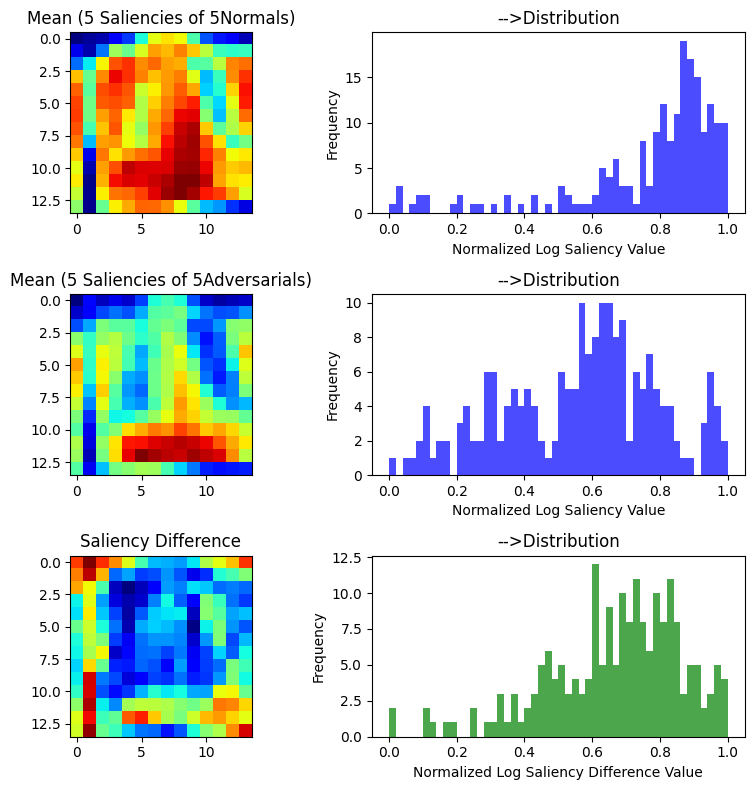

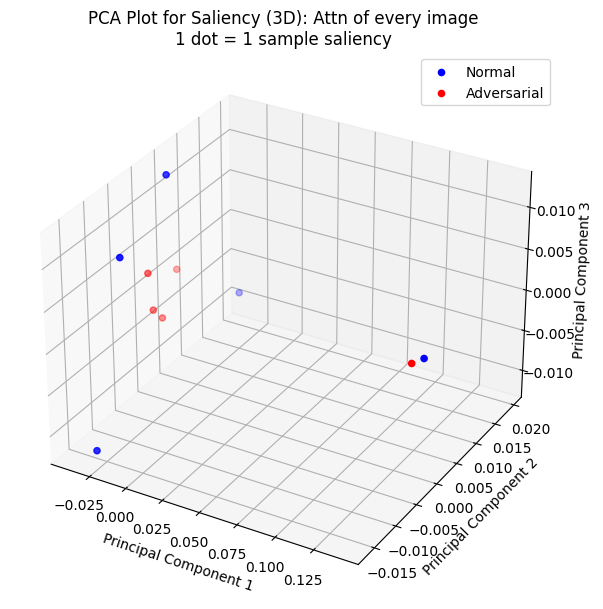

In [18]:
image_folder = '/home/raza.imam/Documents/HC701B/Project/data/TB_data/training/Normal'
block = -1
head = -1
N_images = 5
N_random = True
N_heads = 12

print(f"On Block {block}")
mean_saliency_normal, mean_saliency_adv, saliency_diff, saliencies_normal, saliencies_adv = mean_saliency_generate(N_images=N_images,\
                                                            image_folder=image_folder, N_random=N_random,
                                                            block=block, head=head, N_heads=N_heads, classifier=classifier)
plot_sal_hist_kde(mean_saliency_normal, mean_saliency_adv, saliency_diff, N_images, saliencies_normal, saliencies_adv, kde=False,pca=True)

In [20]:
N = 5
image_folder_N = "/home/raza.imam/Documents/HC701B/Project/data/TB_data/testing/Normal"
image_folder_Adv = '/home/raza.imam/Documents/HC701B/Project/attack_images/Test_attacks_PGD/Normal'

# Sum Metric
csv_folder = "/home/raza.imam/Documents/HC701B/Project/XAI/SumOfDelta.csv"
test_saliencies = generate_and_save_metrics(N, image_folder_Adv, mean_saliency_normal, \
                                            mean_saliency_adv, test_img_saliency, block, head, classifier, \
                                            sum_metric, csv_folder)

/home/raza.imam/.conda/envs/xaim/lib/python3.7/site-packages/captum/_utils/gradient.py:59: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  "required_grads has been set automatically." % index


sum_del_N: 0.6391642093658447 sum_del_A: 0.6861180067062378
sum_del_N: 0.006210135295987129 sum_del_A: 0.05316387861967087
sum_del_N: 0.1889607161283493 sum_del_A: 0.2359144389629364
sum_del_N: 0.3353520333766937 sum_del_A: 0.38230574131011963
sum_del_N: 0.16415680944919586 sum_del_A: 0.21111054718494415
Accuray: 0.0


# 3. 

### Mean of 1000 image attns for each 12 heads. The list len = 12. list[0].shape = (14,14)

In [23]:
image_folder = '/home/raza.imam/Documents/HC701B/Project/data/TB_data/training/Normal'
block = -1
# head = -
N_images = 5
N_random = True
N_heads = 1

mean_12_saliencies_normal = []
mean_12_saliencies_adv = []
saliencies_diff_12_heads = []
saliencies_normal_12_heads = []
saliencies_adv_12_heads = []
 
for head_i in range(12):
    print(f"On Block {block} Head {head_i}")
    mean_saliency_normal, mean_saliency_adv, saliency_diff, saliencies_normal, saliencies_adv = mean_saliency_generate(N_images=N_images,\
                                                                image_folder=image_folder, N_random=N_random,
                                                                block=block, head=head_i, N_heads=N_heads, classifier=classifier)
    mean_12_saliencies_normal.append(mean_saliency_normal)
    mean_12_saliencies_adv.append(mean_saliency_adv)
    saliencies_diff_12_heads.append(saliency_diff)
    saliencies_normal_12_heads.append(saliencies_normal)
    saliencies_adv_12_heads.append(saliencies_adv)

On Block -1 Head 0
mean_saliency_normal.shape: (14, 14)


/home/raza.imam/.conda/envs/xaim/lib/python3.7/site-packages/captum/_utils/gradient.py:59: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  "required_grads has been set automatically." % index


mean_saliency_adv.shape: (14, 14)
saliency_diff.shape: (14, 14)
On Block -1 Head 1
mean_saliency_normal.shape: (14, 14)
mean_saliency_adv.shape: (14, 14)
saliency_diff.shape: (14, 14)
On Block -1 Head 2
mean_saliency_normal.shape: (14, 14)
mean_saliency_adv.shape: (14, 14)
saliency_diff.shape: (14, 14)
On Block -1 Head 3
mean_saliency_normal.shape: (14, 14)
mean_saliency_adv.shape: (14, 14)
saliency_diff.shape: (14, 14)
On Block -1 Head 4
mean_saliency_normal.shape: (14, 14)
mean_saliency_adv.shape: (14, 14)
saliency_diff.shape: (14, 14)
On Block -1 Head 5
mean_saliency_normal.shape: (14, 14)
mean_saliency_adv.shape: (14, 14)
saliency_diff.shape: (14, 14)
On Block -1 Head 6
mean_saliency_normal.shape: (14, 14)
mean_saliency_adv.shape: (14, 14)
saliency_diff.shape: (14, 14)
On Block -1 Head 7
mean_saliency_normal.shape: (14, 14)
mean_saliency_adv.shape: (14, 14)
saliency_diff.shape: (14, 14)
On Block -1 Head 8
mean_saliency_normal.shape: (14, 14)
mean_saliency_adv.shape: (14, 14)
salien

### Plot Mean Attn Map for all 12 heads

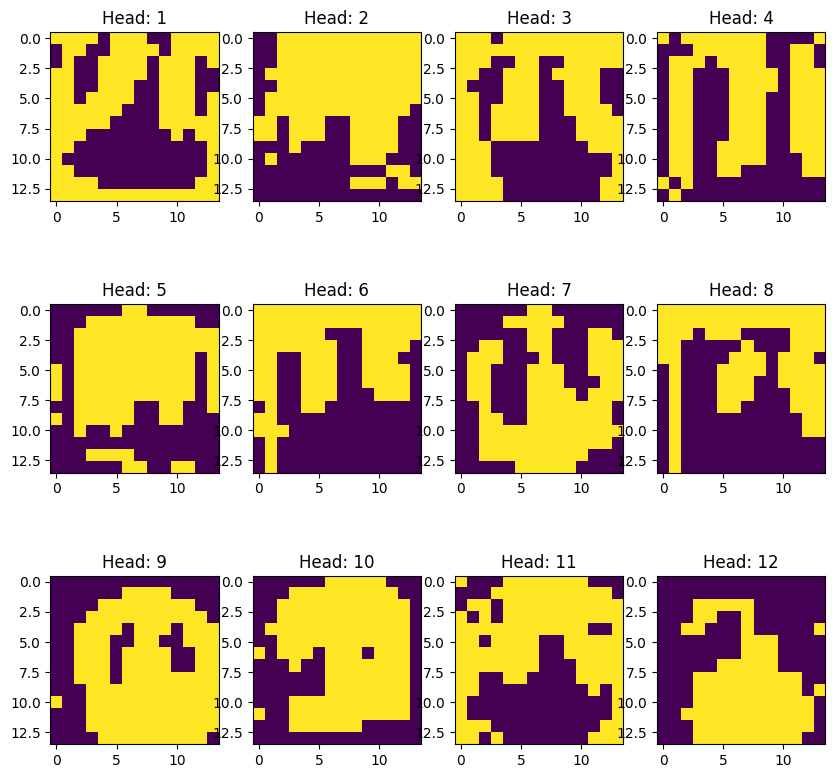

In [85]:
plt.figure(figsize=(10, 10))

mul_adv=None
for i in range(12):
    plt.subplot(3,4,1+i)
    plt.imshow(mean_12_saliencies_adv[i]>mean_12_saliencies_adv[i].mean())
    plt.title(f"Head: {i+1}")
    
    if i ==0:
        mul_adv = mean_12_saliencies_adv[i]
    else:
        mul_adv = mul_adv*mean_12_saliencies_adv[i]      

    
plt.show()

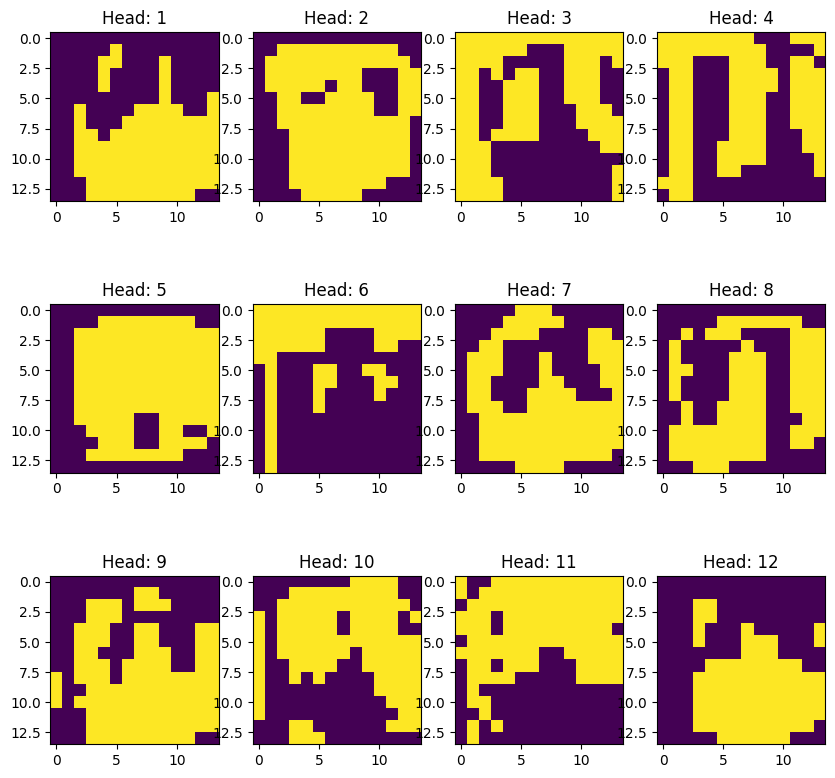

In [86]:
plt.figure(figsize=(10, 10))
mul_n = None
for i in range(12):
    plt.subplot(3,4,1+i)
    plt.imshow(mean_12_saliencies_normal[i]>mean_12_saliencies_normal[i].mean())
    plt.title(f"Head: {i+1}")
    
    if i ==0:
        mul_n = mean_12_saliencies_normal[i]
    else:
        mul_n = mul_n*mean_12_saliencies_normal[i]      
    
plt.show()

### Multiplying each map

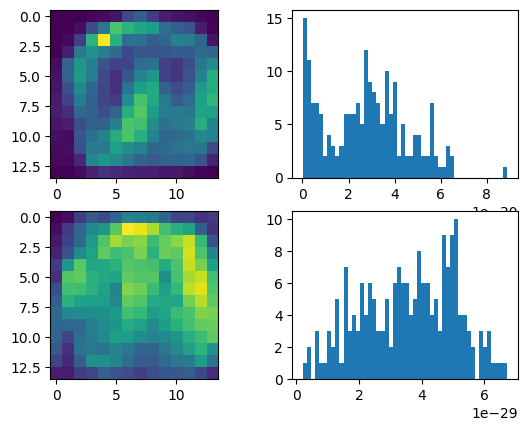

In [49]:
plt.subplot(221)
plt.imshow(mul_n)
plt.subplot(222)
plt.hist(mul_n.flatten(), bins=50)

plt.subplot(223)
plt.imshow(mul_adv)
plt.subplot(224)
plt.hist(mul_adv.flatten(), bins=50)
plt.show()

In [79]:
import cv2
import numpy as np 
from skimage.feature import hog
imput_img = mul_n
# ori = imput_img
gray = imput_img
img = cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB)
# im = cv2.imread("det_1.jpg", cv2.IMREAD_GRAYSCALE)
im = gray.copy()
_, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

/home/raza.imam/.conda/envs/xaim/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  # This is added back by InteractiveShellApp.init_path()


### Testing

In [22]:
N = 5
image_folder_N = "/home/raza.imam/Documents/HC701B/Project/data/TB_data/testing/Normal"
image_folder_Adv = '/home/raza.imam/Documents/HC701B/Project/attack_images/Test_attacks_PGD/Normal'

# Sum Metric
csv_folder = "/home/raza.imam/Documents/HC701B/Project/XAI/SumOfDelta_12H_Ensembles.csv"
test_saliencies = generate_ensemble_preds(N=N, image_folder=image_folder_Adv, mean_12_saliencies_normal=mean_12_saliencies_normal,
                                         mean_12_saliencies_adv = mean_12_saliencies_adv, test_img_saliency=test_img_saliency, metric=sum_metric, out_folder= csv_folder)

NameError: name 'mean_12_saliencies_normal' is not defined